# Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil

import time
import sympy as sp

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import scipy as sc

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
from utilities.assembly_utilities import find_ordering, experimental_local_A, experimental_local_Mh, transoform_nodal_func_to_physical_element
from utilities.K_func_generator import quick_K_func_eval

In [4]:
output_directory = str(ceil(time.time())) + '_' + 'hard_coupling'

### Parameters

In [5]:
# Real domain dimensions
A = 3 # Height
B = 2 # Domain

# Set the number of steps (excluding the initial condition)
num_steps = 27

# Simulation time length
T = num_steps/48

# Time switch conditions (for the boundary condition)
dt_D = 3/48

In [6]:
# Van Genuchten model parameters ( relative permeability model )
theta_s = 0.396
theta_r = 0.131

alpha = 0.423

n = 2.06
K_s = 4.96e-2

m = 1 - 1/n

phi = (theta_s - theta_r)

def initial_h_func(x): return 1

In [7]:
# Set the maximum number of iterations of the non-linear solver
max_iterations_per_step = 1000

# L-scheme parameter
L = 3.501e-2

# Relative and absolute tolerances for the non-linear solver
abs_tol = 1e-5
rel_tol = 1e-5

numeric_tol = 1e-10

In [8]:
dt = (T-0) / num_steps
N = 10 # 16
quad_order = 3

# Domain tolerance
domain_tolerance = 1 / (10 * N)

In [9]:
verbose = False

### Grid and $V_h$

In [10]:
# convert the grid into a mixed-dimensional grid
darcy_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(1)], [B, 1])
darcy_grid.compute_geometry()
pg.convert_from_pp(darcy_grid)

In [11]:
# convert the grid into a mixed-dimensional grid
richards_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(A-1)], [B, 1])
richards_grid.compute_geometry()
pg.convert_from_pp(richards_grid)

In [12]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(darcy_grid, darcy_grid.face_centers[1, :] == 1, faces=True)

In [13]:
key = "flow"

darcy_data = {}

In [14]:
darcy_field    = pg.Lagrange1(key)
richards_field = pg.Lagrange1(key)

gamma_field    = pg.Lagrange1(key)

In [15]:
fixed_rhs = np.zeros( darcy_grid.num_nodes + richards_grid.num_nodes - boundary_grid.num_nodes )

In [16]:
darcy_dof    =    darcy_field.ndof( darcy_grid )
richards_dof = richards_field.ndof( richards_grid )

boundary_dof = gamma_field.ndof( boundary_grid )

In [17]:
darcy_data = {}
richards_data = {}

### Mappings

In [18]:
eta_var = sp.Symbol('eta', negative=False)
x3_var  = sp.Symbol('x3',  negative=False)

In [19]:
darcy_chi_expr    = eta_var * x3_var * (1 + (1-x3_var) * eta_var * x3_var / A) # eta_var * x3_var
richards_chi_expr = eta_var + (A-eta_var)/A*(x3_var-1) * ( eta_var + (x3_var-1) * ( 2*(A-eta_var) - (x3_var-1)*(A-eta_var) ) ) # eta_var + (A-eta_var)*(x3_var-1)

In [20]:
darcy_chi = sp.lambdify( [eta_var, x3_var], darcy_chi_expr.simplify(), 'numpy' )
richards_chi = sp.lambdify( [eta_var, x3_var], richards_chi_expr.simplify(), 'numpy' )

In [21]:
darcy_chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(darcy_chi_expr,  x3_var).simplify(), 'numpy' )
richards_chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(richards_chi_expr,  x3_var).simplify(), 'numpy' )

In [22]:
darcy_chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(darcy_chi_expr, eta_var).simplify(), 'numpy' )
richards_chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(richards_chi_expr, eta_var).simplify(), 'numpy' )

In [23]:
def darcy_real_height(eta_dofs, heights):
    etas = eta_dofs
    if len(eta_dofs) != len(heights):
        etas = np.tile(eta_dofs, ceil( len(heights) / len(etas) ) )

    return darcy_chi(etas, heights)

In [24]:
def richards_real_height(eta_dofs, heights):
    etas = eta_dofs
    if len(eta_dofs) != len(heights):
        etas = np.tile(eta_dofs, ceil( len(heights) / len(etas) ) )

    return richards_chi(etas, heights)

### $\theta$ and $K$

In [25]:
# Symbolic psi
h_var = sp.Symbol('h', negative=True)

# Symbolic Theta
theta_expression = theta_r + (theta_s - theta_r) / (1 + (-alpha * (h_var - richards_chi_expr)) ** n) ** m
effective_saturation = (theta_expression - theta_r) / (theta_s - theta_r)

# Symbolic Conductivity K
hydraulic_conductivity_expression = K_s * (effective_saturation ** 0.5) * ( 1 - (1 - effective_saturation ** (1 / m)) ** m ) ** 2

In [26]:
# Theta lambda
theta_lambda = sp.lambdify([h_var, eta_var, x3_var], sp.Piecewise(
    (theta_expression, h_var < richards_chi_expr),
    (theta_s, True)
), 'numpy')

# Conductivity tensor lambda
conductivity_lambda = sp.lambdify([h_var, eta_var, x3_var], sp.Piecewise(
    (hydraulic_conductivity_expression, h_var < richards_chi_expr),
    (K_s, True)
), 'numpy')

In [27]:
# Actual (and final) theta function
def theta(h, eta):
    return theta_lambda( h, np.tile(eta, round(len(h) / len(eta))), richards_grid.nodes[1, :] + 1)

In [28]:
def conductivity(h, eta, x3):
    return conductivity_lambda(h, eta, x3)

### BC

##### Restrictor matrices

In [29]:
darcy_remove_boundary = np.zeros(shape=(darcy_dof - boundary_dof, darcy_dof))
darcy_remove_boundary[ np.arange(darcy_dof - boundary_dof), darcy_grid.nodes[1, :] < 1 ] = 1
darcy_remove_boundary = sps.csr_matrix(darcy_remove_boundary)

In [30]:
richards_remove_boundary = np.zeros(shape=(richards_dof - boundary_dof, richards_dof))
richards_remove_boundary[ np.arange(richards_dof - boundary_dof), richards_grid.nodes[1, :] > 0 ] = 1
richards_remove_boundary = sps.csr_matrix(richards_remove_boundary)

##### Dirichlet (essential)

In [31]:
darcy_dirichlet_flag  = np.array(darcy_grid.nodes[0, :] == B, dtype=bool)
darcy_dirichlet_value = np.array(darcy_dirichlet_flag, dtype=float)

In [32]:
richards_dirichlet_flag  = np.array(np.logical_and(richards_grid.nodes[1, :] == 1, richards_grid.nodes[0, :] <= 1 ), dtype=bool)
richards_dirichlet_value = lambda t: np.array(richards_dirichlet_flag, dtype=float) * min(6.2, 1 + 5.2 * t / dt_D)

In [33]:
dirichlet_flag  = lambda t: np.hstack((darcy_dirichlet_flag, richards_dirichlet_flag, np.zeros(shape=boundary_dof, dtype=bool)))
dirichlet_value = lambda t: np.hstack((darcy_dirichlet_value, richards_dirichlet_value(t), np.zeros(shape=boundary_dof)))

##### Neumann (natural)

In [34]:
# Full no-flow condition for the Neumann part.... nothing to add

### Matrix Assembly

##### Masks

In [35]:
darcy_mask = np.zeros(shape=(darcy_dof + richards_dof + boundary_dof), dtype=bool)
darcy_mask[ : (darcy_dof) ] = True

In [36]:
darcy_internal_mask = np.zeros(shape=(darcy_dof + richards_dof + boundary_dof), dtype=bool)
darcy_internal_mask[ : (darcy_dof-boundary_dof) ] = True

In [37]:
richards_mask = np.zeros_like(darcy_mask, dtype=bool)
richards_mask[(darcy_dof):(darcy_dof + richards_dof)] = True

In [38]:
boundary_mask = np.zeros_like(darcy_mask, dtype=bool)
boundary_mask[(darcy_dof - boundary_dof):(darcy_dof)] = True

In [39]:
lambda_mask = np.zeros_like(darcy_mask)
lambda_mask[(darcy_dof + richards_dof):] = True

##### Finite difference matrices

In [40]:
eta_diff = gamma_field.assemble_diff_matrix( boundary_grid )
eta_diff[0,0] = -1
eta_diff *= N

#### Stifness

In [41]:
def richards_stifness(eta_dofs, h_dofs):

    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()

    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))

        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        coord_loc[1, :] += 1

        h_func = transoform_nodal_func_to_physical_element(h_dofs[nodes_loc], coord_loc)
        loc_A = experimental_local_A(coord_loc,
                    lambda x,y: quick_K_func_eval(richards_chi_x3(eta(x), y), richards_chi_eta(eta(x), y), grad_eta[eta_cell], conductivity(h_func(x,y), eta(x), y)),
                    quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = loc_A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [42]:
def darcy_stifness(eta_dofs):
    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(darcy_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = darcy_grid.cell_nodes()

    for c in np.arange(darcy_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < darcy_grid.cell_centers[0, c] ))

        
        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        loc_A = experimental_local_A(coord_loc,
                    lambda x,y: quick_K_func_eval(darcy_chi_x3(eta(x), y), darcy_chi_eta(eta(x), y), grad_eta[eta_cell], K_s),
                    quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = loc_A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Mass matrices

In [43]:
def darcy_mass(eta_dofs):
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(darcy_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = darcy_grid.cell_nodes()
        
    for c in np.arange(darcy_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < darcy_grid.cell_centers[0, c] ))
        
        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        A = experimental_local_Mh(coord_loc, lambda x,y: darcy_chi_x3(eta(x), y), quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [44]:
def richards_mass(eta_dofs):
    size = np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0
    
    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(richards_grid)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = richards_grid.cell_nodes()
        
    for c in np.arange(richards_grid.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < richards_grid.cell_centers[0, c] ))
        
        ls_node = np.min(coord_loc[0, :])
        cell_width = np.max(coord_loc[0, :]) - ls_node

        ls_eta = eta_dofs[eta_cell]
        rs_eta = eta_dofs[eta_cell+1]
        eta = lambda x: ls_eta + (x - ls_node) / cell_width * (rs_eta - ls_eta)

        A = experimental_local_Mh(coord_loc, lambda x,y: richards_chi_x3(eta(x), 1+y), quad_order)

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Projection matrices

In [45]:
darcy_proj    =    darcy_field.eval_at_cell_centers( darcy_grid )
richards_proj = richards_field.eval_at_cell_centers( richards_grid )

#### Restrictor matrices

In [46]:
darcy_restrict_to_boundary = np.zeros(shape=(boundary_dof, darcy_dof))
darcy_restrict_to_boundary[np.arange(boundary_dof), darcy_grid.nodes[1, :] == 1] = 1

In [47]:
richards_restrict_to_boundary = np.zeros(shape=(boundary_dof, richards_dof))
richards_restrict_to_boundary[np.arange(boundary_dof), richards_grid.nodes[1, :] == 0] = 1

### Solve System

In [48]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [49]:
# Fixed rhs
fixed_rhs = np.zeros(darcy_dof + richards_dof + boundary_dof)

In [50]:
# Initial conditions
sol = [np.zeros_like(fixed_rhs)]
sol[-1][darcy_mask]    = darcy_field.interpolate( darcy_grid, initial_h_func )
sol[-1][richards_mask] = richards_field.interpolate( richards_grid, initial_h_func )

In [51]:
def save_step(sol, savers, i):

    for saver, proj, mask, grid, heights in zip(savers, [darcy_proj, richards_proj], [darcy_mask, richards_mask], [darcy_grid, richards_grid], [darcy_real_height(np.tile(sol[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes)), darcy_grid.nodes[1,:]), 
                                                                                                                                                richards_real_height(np.tile(sol[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :])]):
        ins = list()

        ins.append((grid, "cell_h", proj @ sol[mask]))
        ins.append((grid, "cell_p", proj @ (sol[mask] - heights)))

        saver.write_vtu(ins, time_step=i)

In [52]:
# Save the initial solution
savers = [pp.Exporter(darcy_grid, 'sol_D', folder_name=output_directory), 
          pp.Exporter(richards_grid, 'sol_R', folder_name=output_directory)]
save_step(sol[-1], savers, 0)

In [53]:
csv_base = os.path.join(output_directory, 'csv')
os.mkdir( csv_base )

In [54]:
cm_data = [
    [0.2422, 0.1504, 0.6603],
    [0.2444, 0.1534, 0.6728],
    [0.2464, 0.1569, 0.6847],
    [0.2484, 0.1607, 0.6961],
    [0.2503, 0.1648, 0.7071],
    [0.2522, 0.1689, 0.7179],
    [0.2540, 0.1732, 0.7286],
    [0.2558, 0.1773, 0.7393],
    [0.2576, 0.1814, 0.7501],
    [0.2594, 0.1854, 0.7610],
    [0.2611, 0.1893, 0.7719],
    [0.2628, 0.1932, 0.7828],
    [0.2645, 0.1972, 0.7937],
    [0.2661, 0.2011, 0.8043],
    [0.2676, 0.2052, 0.8148],
    [0.2691, 0.2094, 0.8249],
    [0.2704, 0.2138, 0.8346],
    [0.2717, 0.2184, 0.8439],
    [0.2729, 0.2231, 0.8528],
    [0.2740, 0.2280, 0.8612],
    [0.2749, 0.2330, 0.8692],
    [0.2758, 0.2382, 0.8767],
    [0.2766, 0.2435, 0.8840],
    [0.2774, 0.2489, 0.8908],
    [0.2781, 0.2543, 0.8973],
    [0.2788, 0.2598, 0.9035],
    [0.2794, 0.2653, 0.9094],
    [0.2798, 0.2708, 0.9150],
    [0.2802, 0.2764, 0.9204],
    [0.2806, 0.2819, 0.9255],
    [0.2809, 0.2875, 0.9305],
    [0.2811, 0.2930, 0.9352],
    [0.2813, 0.2985, 0.9397],
    [0.2814, 0.3040, 0.9441],
    [0.2814, 0.3095, 0.9483],
    [0.2813, 0.3150, 0.9524],
    [0.2811, 0.3204, 0.9563],
    [0.2809, 0.3259, 0.9600],
    [0.2807, 0.3313, 0.9636],
    [0.2803, 0.3367, 0.9670],
    [0.2798, 0.3421, 0.9702],
    [0.2791, 0.3475, 0.9733],
    [0.2784, 0.3529, 0.9763],
    [0.2776, 0.3583, 0.9791],
    [0.2766, 0.3638, 0.9817],
    [0.2754, 0.3693, 0.9840],
    [0.2741, 0.3748, 0.9862],
    [0.2726, 0.3804, 0.9881],
    [0.2710, 0.3860, 0.9898],
    [0.2691, 0.3916, 0.9912],
    [0.2670, 0.3973, 0.9924],
    [0.2647, 0.4030, 0.9935],
    [0.2621, 0.4088, 0.9946],
    [0.2591, 0.4145, 0.9955],
    [0.2556, 0.4203, 0.9965],
    [0.2517, 0.4261, 0.9974],
    [0.2473, 0.4319, 0.9983],
    [0.2424, 0.4378, 0.9991],
    [0.2369, 0.4437, 0.9996],
    [0.2311, 0.4497, 0.9995],
    [0.2250, 0.4559, 0.9985],
    [0.2189, 0.4620, 0.9968],
    [0.2128, 0.4682, 0.9948],
    [0.2066, 0.4743, 0.9926],
    [0.2006, 0.4803, 0.9906],
    [0.1950, 0.4861, 0.9887],
    [0.1903, 0.4919, 0.9867],
    [0.1869, 0.4975, 0.9844],
    [0.1847, 0.5030, 0.9819],
    [0.1831, 0.5084, 0.9793],
    [0.1818, 0.5138, 0.9766],
    [0.1806, 0.5191, 0.9738],
    [0.1795, 0.5244, 0.9709],
    [0.1785, 0.5296, 0.9677],
    [0.1778, 0.5349, 0.9641],
    [0.1773, 0.5401, 0.9602],
    [0.1768, 0.5452, 0.9560],
    [0.1764, 0.5504, 0.9516],
    [0.1755, 0.5554, 0.9473],
    [0.1740, 0.5605, 0.9432],
    [0.1716, 0.5655, 0.9393],
    [0.1686, 0.5705, 0.9357],
    [0.1649, 0.5755, 0.9323],
    [0.1610, 0.5805, 0.9289],
    [0.1573, 0.5854, 0.9254],
    [0.1540, 0.5902, 0.9218],
    [0.1513, 0.5950, 0.9182],
    [0.1492, 0.5997, 0.9147],
    [0.1475, 0.6043, 0.9113],
    [0.1461, 0.6089, 0.9080],
    [0.1446, 0.6135, 0.9050],
    [0.1429, 0.6180, 0.9022],
    [0.1408, 0.6226, 0.8998],
    [0.1383, 0.6272, 0.8975],
    [0.1354, 0.6317, 0.8953],
    [0.1321, 0.6363, 0.8932],
    [0.1288, 0.6408, 0.8910],
    [0.1253, 0.6453, 0.8887],
    [0.1219, 0.6497, 0.8862],
    [0.1185, 0.6541, 0.8834],
    [0.1152, 0.6584, 0.8804],
    [0.1119, 0.6627, 0.8770],
    [0.1085, 0.6669, 0.8734],
    [0.1048, 0.6710, 0.8695],
    [0.1009, 0.6750, 0.8653],
    [0.0964, 0.6789, 0.8609],
    [0.0914, 0.6828, 0.8562],
    [0.0855, 0.6865, 0.8513],
    [0.0789, 0.6902, 0.8462],
    [0.0713, 0.6938, 0.8409],
    [0.0628, 0.6972, 0.8355],
    [0.0535, 0.7006, 0.8299],
    [0.0433, 0.7039, 0.8242],
    [0.0328, 0.7071, 0.8183],
    [0.0234, 0.7103, 0.8124],
    [0.0155, 0.7133, 0.8064],
    [0.0091, 0.7163, 0.8003],
    [0.0046, 0.7192, 0.7941],
    [0.0019, 0.7220, 0.7878],
    [0.0009, 0.7248, 0.7815],
    [0.0018, 0.7275, 0.7752],
    [0.0046, 0.7301, 0.7688],
    [0.0094, 0.7327, 0.7623],
    [0.0162, 0.7352, 0.7558],
    [0.0253, 0.7376, 0.7492],
    [0.0369, 0.7400, 0.7426],
    [0.0504, 0.7423, 0.7359],
    [0.0638, 0.7446, 0.7292],
    [0.0770, 0.7468, 0.7224],
    [0.0899, 0.7489, 0.7156],
    [0.1023, 0.7510, 0.7088],
    [0.1141, 0.7531, 0.7019],
    [0.1252, 0.7552, 0.6950],
    [0.1354, 0.7572, 0.6881],
    [0.1448, 0.7593, 0.6812],
    [0.1532, 0.7614, 0.6741],
    [0.1609, 0.7635, 0.6671],
    [0.1678, 0.7656, 0.6599],
    [0.1741, 0.7678, 0.6527],
    [0.1799, 0.7699, 0.6454],
    [0.1853, 0.7721, 0.6379],
    [0.1905, 0.7743, 0.6303],
    [0.1954, 0.7765, 0.6225],
    [0.2003, 0.7787, 0.6146],
    [0.2061, 0.7808, 0.6065],
    [0.2118, 0.7828, 0.5983],
    [0.2178, 0.7849, 0.5899],
    [0.2244, 0.7869, 0.5813],
    [0.2318, 0.7887, 0.5725],
    [0.2401, 0.7905, 0.5636],
    [0.2491, 0.7922, 0.5546],
    [0.2589, 0.7937, 0.5454],
    [0.2695, 0.7951, 0.5360],
    [0.2809, 0.7964, 0.5266],
    [0.2929, 0.7975, 0.5170],
    [0.3052, 0.7985, 0.5074],
    [0.3176, 0.7994, 0.4975],
    [0.3301, 0.8002, 0.4876],
    [0.3424, 0.8009, 0.4774],
    [0.3548, 0.8016, 0.4669],
    [0.3671, 0.8021, 0.4563],
    [0.3795, 0.8026, 0.4454],
    [0.3921, 0.8029, 0.4344],
    [0.4050, 0.8031, 0.4233],
    [0.4184, 0.8030, 0.4122],
    [0.4322, 0.8028, 0.4013],
    [0.4463, 0.8024, 0.3904],
    [0.4608, 0.8018, 0.3797],
    [0.4753, 0.8011, 0.3691],
    [0.4899, 0.8002, 0.3586],
    [0.5044, 0.7993, 0.3480],
    [0.5187, 0.7982, 0.3374],
    [0.5329, 0.7970, 0.3267],
    [0.5470, 0.7957, 0.3159],
    [0.5609, 0.7943, 0.3050],
    [0.5748, 0.7929, 0.2941],
    [0.5886, 0.7913, 0.2833],
    [0.6024, 0.7896, 0.2726],
    [0.6161, 0.7878, 0.2622],
    [0.6297, 0.7859, 0.2521],
    [0.6433, 0.7839, 0.2423],
    [0.6567, 0.7818, 0.2329],
    [0.6701, 0.7796, 0.2239],
    [0.6833, 0.7773, 0.2155],
    [0.6963, 0.7750, 0.2075],
    [0.7091, 0.7727, 0.1998],
    [0.7218, 0.7703, 0.1924],
    [0.7344, 0.7679, 0.1852],
    [0.7468, 0.7654, 0.1782],
    [0.7590, 0.7629, 0.1717],
    [0.7710, 0.7604, 0.1658],
    [0.7829, 0.7579, 0.1608],
    [0.7945, 0.7554, 0.1570],
    [0.8060, 0.7529, 0.1546],
    [0.8172, 0.7505, 0.1535],
    [0.8281, 0.7481, 0.1536],
    [0.8389, 0.7457, 0.1546],
    [0.8495, 0.7435, 0.1564],
    [0.8600, 0.7413, 0.1587],
    [0.8703, 0.7392, 0.1615],
    [0.8804, 0.7372, 0.1650],
    [0.8903, 0.7353, 0.1695],
    [0.9000, 0.7336, 0.1749],
    [0.9093, 0.7321, 0.1815],
    [0.9184, 0.7308, 0.1890],
    [0.9272, 0.7298, 0.1973],
    [0.9357, 0.7290, 0.2061],
    [0.9440, 0.7285, 0.2151],
    [0.9523, 0.7284, 0.2237],
    [0.9606, 0.7285, 0.2312],
    [0.9689, 0.7292, 0.2373],
    [0.9770, 0.7304, 0.2418],
    [0.9842, 0.7330, 0.2446],
    [0.9900, 0.7365, 0.2429],
    [0.9946, 0.7407, 0.2394],
    [0.9966, 0.7458, 0.2351],
    [0.9971, 0.7513, 0.2309],
    [0.9972, 0.7569, 0.2267],
    [0.9971, 0.7626, 0.2224],
    [0.9969, 0.7683, 0.2181],
    [0.9966, 0.7740, 0.2138],
    [0.9962, 0.7798, 0.2095],
    [0.9957, 0.7856, 0.2053],
    [0.9949, 0.7915, 0.2012],
    [0.9938, 0.7974, 0.1974],
    [0.9923, 0.8034, 0.1939],
    [0.9906, 0.8095, 0.1906],
    [0.9885, 0.8156, 0.1875],
    [0.9861, 0.8218, 0.1846],
    [0.9835, 0.8280, 0.1817],
    [0.9807, 0.8342, 0.1787],
    [0.9778, 0.8404, 0.1757],
    [0.9748, 0.8467, 0.1726],
    [0.9720, 0.8529, 0.1695],
    [0.9694, 0.8591, 0.1665],
    [0.9671, 0.8654, 0.1636],
    [0.9651, 0.8716, 0.1608],
    [0.9634, 0.8778, 0.1582],
    [0.9619, 0.8840, 0.1557],
    [0.9608, 0.8902, 0.1532],
    [0.9601, 0.8963, 0.1507],
    [0.9596, 0.9023, 0.1480],
    [0.9595, 0.9084, 0.1450],
    [0.9597, 0.9143, 0.1418],
    [0.9601, 0.9203, 0.1382],
    [0.9608, 0.9262, 0.1344],
    [0.9618, 0.9320, 0.1304],
    [0.9629, 0.9379, 0.1261],
    [0.9642, 0.9437, 0.1216],
    [0.9657, 0.9494, 0.1168],
    [0.9674, 0.9552, 0.1116],
    [0.9692, 0.9609, 0.1061],
    [0.9711, 0.9667, 0.1001],
    [0.9730, 0.9724, 0.0938],
    [0.9749, 0.9782, 0.0872],
    [0.9769, 0.9839, 0.0805]
]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [55]:
def export_csv(index, solution, plot_figure=False, plot_value=False):
    export_name = os.path.join(csv_base, str(index) + '.csv')
    
    xs = []
    ys = []
    hs = []

    with open( export_name, 'w' ) as file:
        file.write('x,y,h,p\n')

        et = np.tile(solution[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes) - 1)
        ff = np.where(darcy_grid.nodes[1, :] < 1)[0]
        hd = darcy_real_height(et, darcy_grid.nodes[1, ff])
        for x,y,h,p in zip( darcy_grid.nodes[0, ff], hd, solution[darcy_internal_mask], solution[darcy_internal_mask] - hd):
            file.write(f'{x},{y},{h},{p}\n')
            xs.append(x)
            ys.append(y)
            hs.append(h)

        et = np.tile(solution[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes))
        hd = richards_real_height(et, 1+richards_grid.nodes[1, :])
        for x,y,h,p in zip( richards_grid.nodes[0, :], hd, solution[richards_mask], solution[richards_mask] - hd ):
            file.write(f'{x},{y},{h},{p}\n')
            xs.append(x)
            ys.append(y)
            hs.append(h)
    
    xs = np.array(xs).reshape((3*N+1, 2*N+1))
    ys = np.array(ys).reshape((3*N+1, 2*N+1))
    hs = np.array(hs).reshape((3*N+1, 2*N+1))
    
    if plot_figure:

        fig = plt.figure(figsize=(7, 10))
        ax = fig.subplots(1,1)
        
        CS = ax.contourf(xs, ys, hs, min((3*N+1) * (2*N+1), 1000), cmap=parula_map)

        cbar = fig.colorbar(CS)
        
        plt.show()

    if plot_value:
        index = np.argmin(np.abs(xs[0, :] - 0.05))

        fig = plt.figure(figsize=(10, 5))
        ax = fig.subplots(1,1)
        ax.plot( ys[:, index], hs[:, index], 'o-r' )
        ax.set_ylim(0.9, 6.5)

        ax.grid()

        ax.set_title('Elevation head at y=0.05 m')

        plt.show()

Time 0.02083
Iteration #0001, error L2 relative psi:    5.800998869


Iteration #0002, error L2 relative psi:    1.828502465
Iteration #0003, error L2 relative psi:    0.246510706
Iteration #0004, error L2 relative psi:    0.014877558
Iteration #0005, error L2 relative psi:    0.002408032
Iteration #0006, error L2 relative psi:    0.000337767
Iteration #0007, error L2 relative psi:    0.000030141



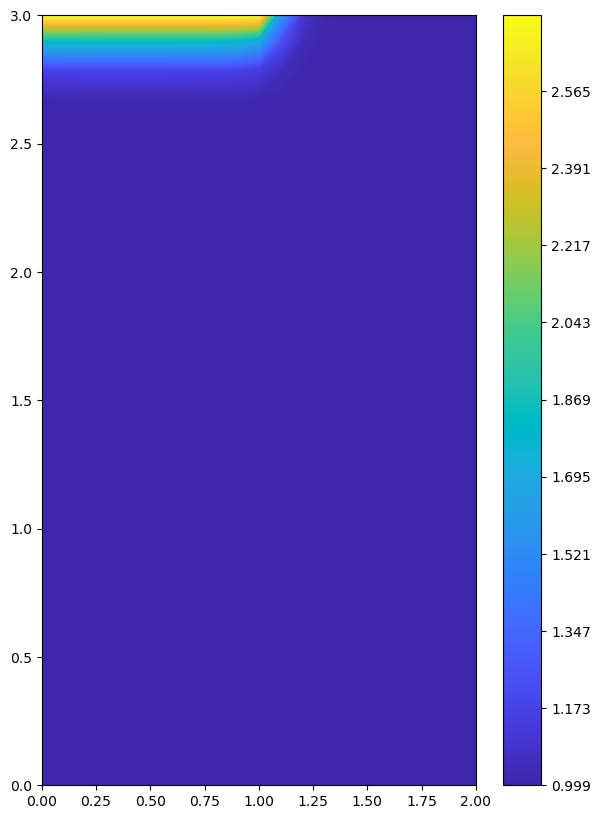

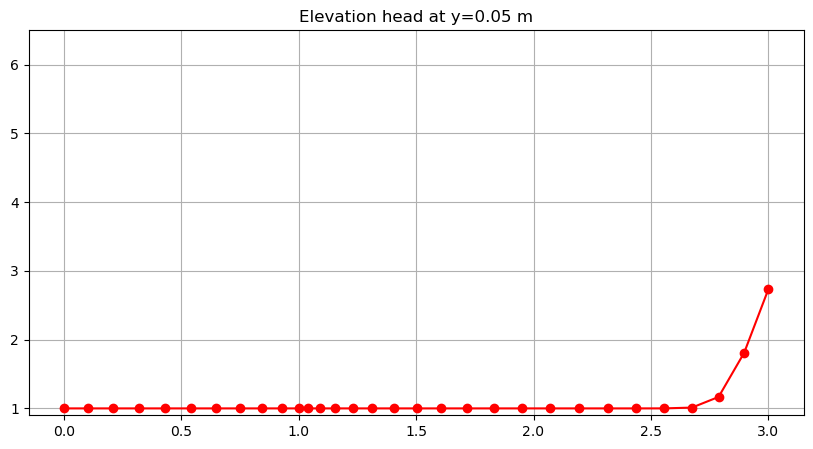

Time 0.04167
Iteration #0001, error L2 relative psi:    7.400685415


<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in power
  return select([less(h, eta + (1 - 1/3*eta)*(eta + (x3 - 1)*(-2*eta - (3 - eta)*(x3 - 1) + 6))*(x3 - 1)),True], [0.265*(0.1699265174169*(eta - h + (1 - 1/3*eta)*(eta + (x3 - 1)*(-2*eta - (3 - eta)*(x3 - 1) + 6))*(x3 - 1))**2.06 + 1)**(-0.514563106796116) + 0.131,0.396], default=nan)
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in scalar power
  return select([less(h, eta + (1 - 1/3*eta)*(eta + (x3 - 1)*(-2*eta - (3 - eta)*(x3 - 1) + 6))*(x3 - 1)),True], [0.0496*(1 - (1 - 1.0*(0.1699265174169*(eta - h + (1 - 1/3*eta)*(eta + (x3 - 1)*(-2*eta - (3 - eta)*(x3 - 1) + 6))*(x3 - 1))**2.06 + 1)**(-1.0))**0.514563106796116)**2*(0.1699265174169*(eta - h + (1 - 1/3*eta)*(eta + (x3 - 1)*(-2*eta - (3 - eta)*(x3 - 1) + 6))*(x3 - 1))**2.06 + 1)**(-0.257281553398058),0.0496], default=nan)


Iteration #0002, error L2 relative psi:    2.669938881
Iteration #0003, error L2 relative psi:    0.871497959
Iteration #0004, error L2 relative psi:    0.190493575
Iteration #0005, error L2 relative psi:    0.069999688
Iteration #0006, error L2 relative psi:    0.020056794
Iteration #0007, error L2 relative psi:    0.004760345
Iteration #0008, error L2 relative psi:    0.001586471
Iteration #0009, error L2 relative psi:    0.000407534
Iteration #0010, error L2 relative psi:    0.000125597



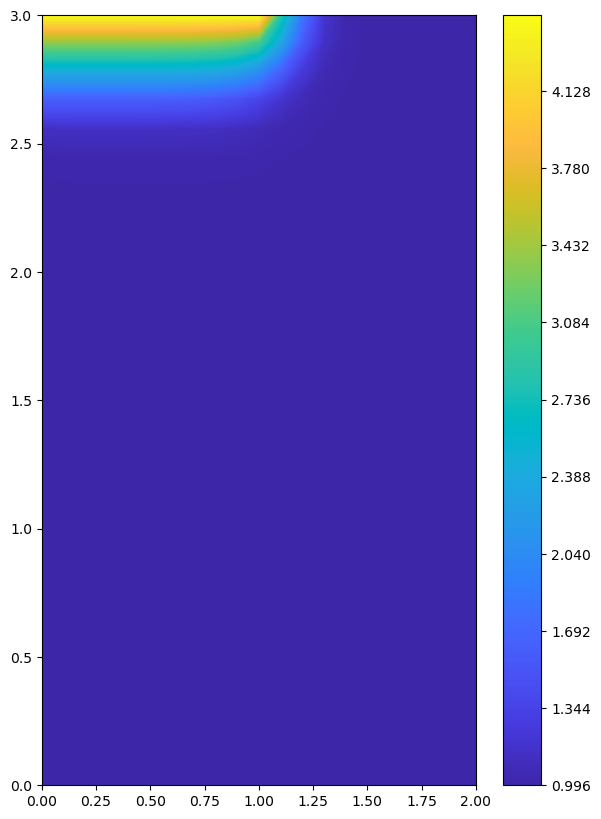

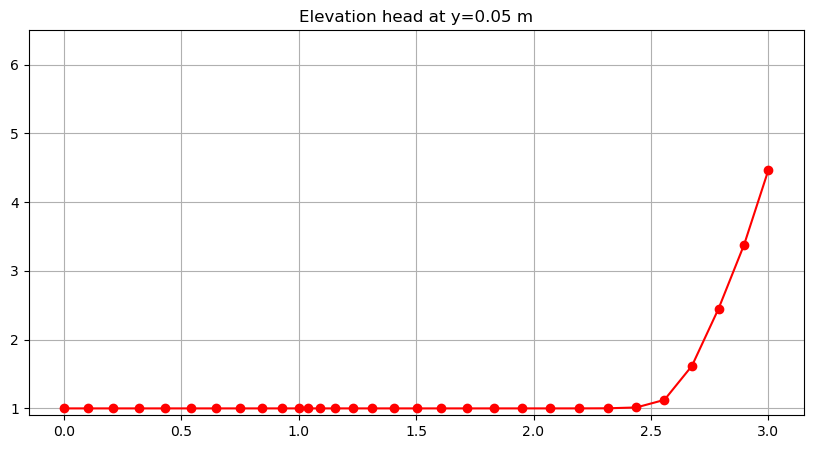

Time 0.0625
Iteration #0001, error L2 relative psi:    8.901612504
Iteration #0002, error L2 relative psi:    2.544456218
Iteration #0003, error L2 relative psi:    0.976861502
Iteration #0004, error L2 relative psi:    0.305207529
Iteration #0005, error L2 relative psi:    0.083880179
Iteration #0006, error L2 relative psi:    0.025193004
Iteration #0007, error L2 relative psi:    0.010502156
Iteration #0008, error L2 relative psi:    0.004604058
Iteration #0009, error L2 relative psi:    0.001934928
Iteration #0010, error L2 relative psi:    0.000787095
Iteration #0011, error L2 relative psi:    0.000322402



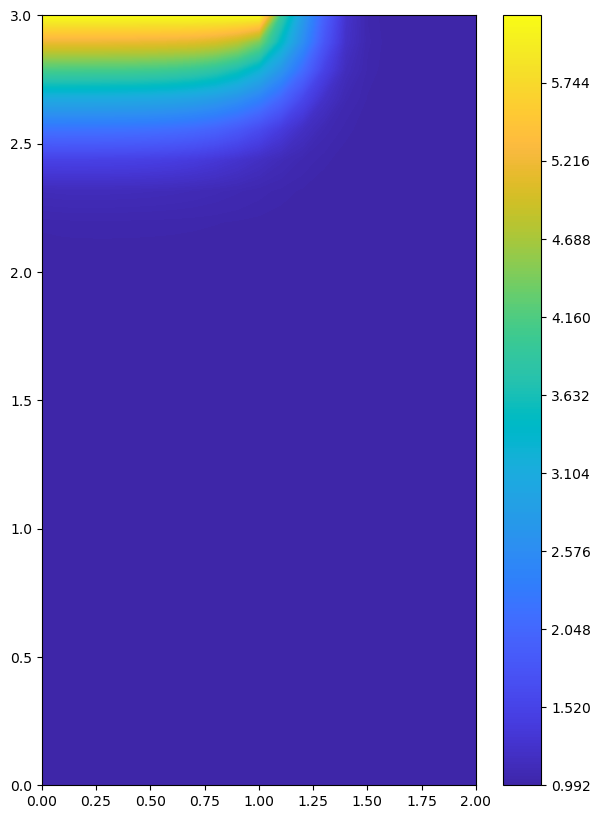

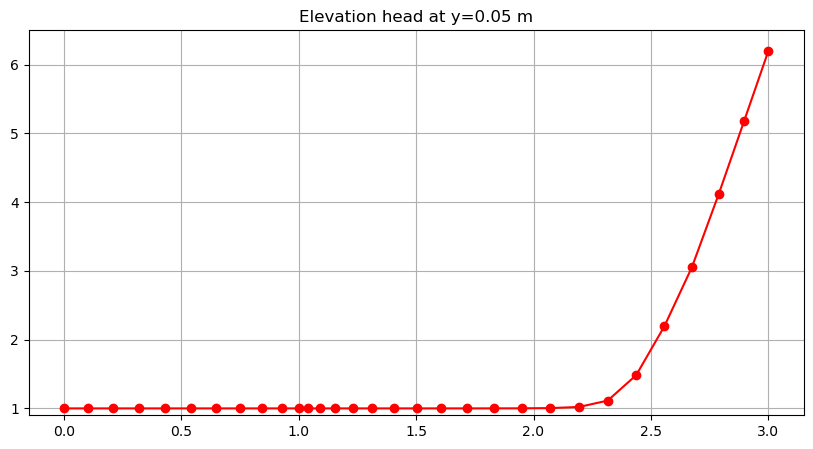

Time 0.08333
Iteration #0001, error L2 relative psi:    3.523947216
Iteration #0002, error L2 relative psi:    1.352279854
Iteration #0003, error L2 relative psi:    0.607167009
Iteration #0004, error L2 relative psi:    0.301466511
Iteration #0005, error L2 relative psi:    0.165792618
Iteration #0006, error L2 relative psi:    0.096333152
Iteration #0007, error L2 relative psi:    0.056819947
Iteration #0008, error L2 relative psi:    0.033578881
Iteration #0009, error L2 relative psi:    0.019868019
Iteration #0010, error L2 relative psi:    0.011785169
Iteration #0011, error L2 relative psi:    0.007023268
Iteration #0012, error L2 relative psi:    0.004216737
Iteration #0013, error L2 relative psi:    0.002562658
Iteration #0014, error L2 relative psi:    0.001588629
Iteration #0015, error L2 relative psi:    0.001016665
Iteration #0016, error L2 relative psi:    0.000682315
Iteration #0017, error L2 relative psi:    0.000487311
Iteration #0018, error L2 relative psi:    0.0003723

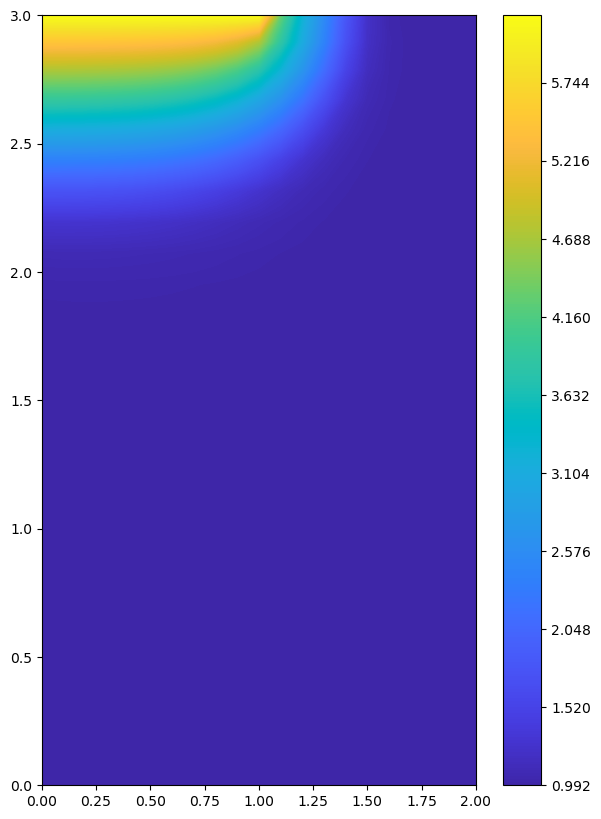

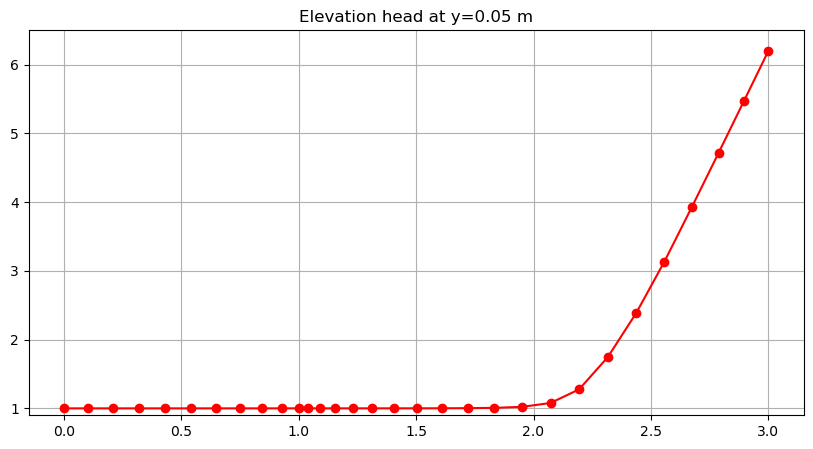

Time 0.10417
Iteration #0001, error L2 relative psi:    2.524878198
Iteration #0002, error L2 relative psi:    0.940576293
Iteration #0003, error L2 relative psi:    0.500048363
Iteration #0004, error L2 relative psi:    0.310771597
Iteration #0005, error L2 relative psi:    0.207369000
Iteration #0006, error L2 relative psi:    0.142110284
Iteration #0007, error L2 relative psi:    0.098518915
Iteration #0008, error L2 relative psi:    0.068749730
Iteration #0009, error L2 relative psi:    0.048245164
Iteration #0010, error L2 relative psi:    0.034064771
Iteration #0011, error L2 relative psi:    0.024238672
Iteration #0012, error L2 relative psi:    0.017416283
Iteration #0013, error L2 relative psi:    0.012673714
Iteration #0014, error L2 relative psi:    0.009373518
Iteration #0015, error L2 relative psi:    0.007072311
Iteration #0016, error L2 relative psi:    0.005462107
Iteration #0017, error L2 relative psi:    0.004328154
Iteration #0018, error L2 relative psi:    0.0035204

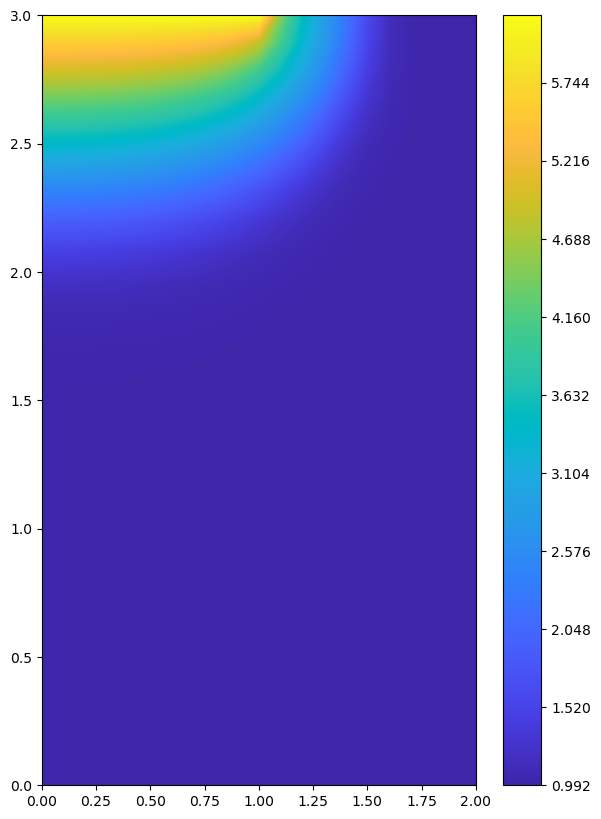

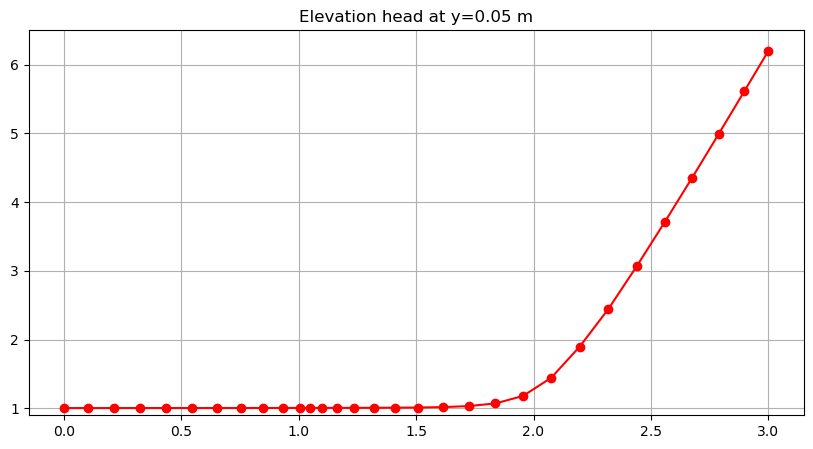

Time 0.125
Iteration #0001, error L2 relative psi:    2.007654561
Iteration #0002, error L2 relative psi:    0.752849906
Iteration #0003, error L2 relative psi:    0.445588699
Iteration #0004, error L2 relative psi:    0.309829153
Iteration #0005, error L2 relative psi:    0.230286068
Iteration #0006, error L2 relative psi:    0.176369764
Iteration #0007, error L2 relative psi:    0.137484074
Iteration #0008, error L2 relative psi:    0.108634808
Iteration #0009, error L2 relative psi:    0.086899441
Iteration #0010, error L2 relative psi:    0.070360082
Iteration #0011, error L2 relative psi:    0.057674937
Iteration #0012, error L2 relative psi:    0.047876036
Iteration #0013, error L2 relative psi:    0.040249509
Iteration #0014, error L2 relative psi:    0.034262830
Iteration #0015, error L2 relative psi:    0.029517697
Iteration #0016, error L2 relative psi:    0.025712461
Iteration #0017, error L2 relative psi:    0.022620118
Iteration #0018, error L2 relative psi:    0.020071501

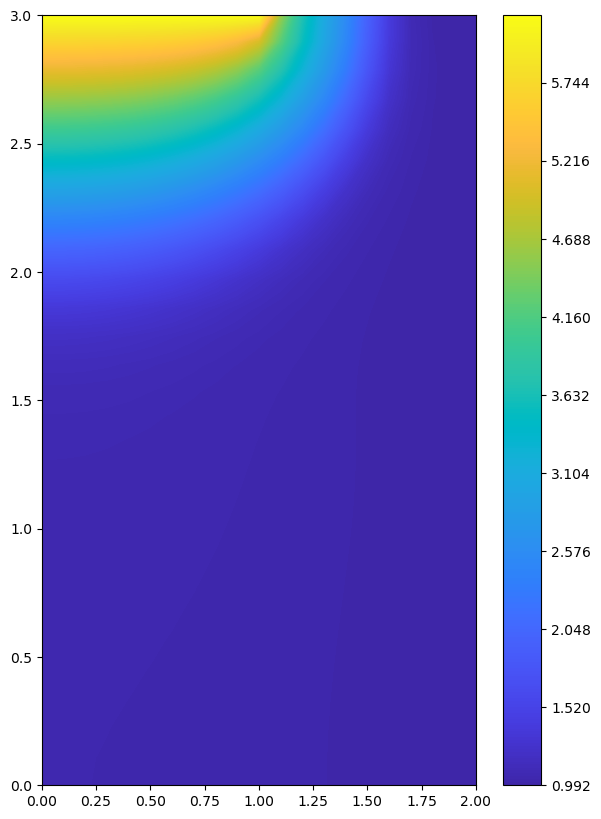

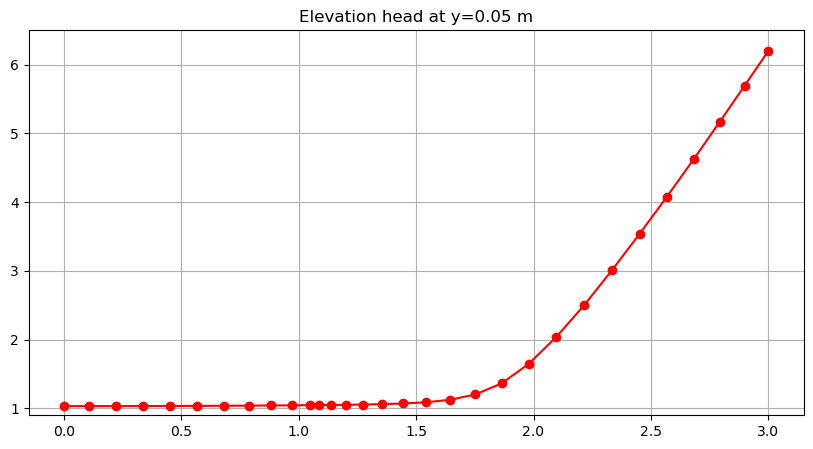

Time 0.14583
Iteration #0001, error L2 relative psi:    1.693252590
Iteration #0002, error L2 relative psi:    0.695848800
Iteration #0003, error L2 relative psi:    0.470931330
Iteration #0004, error L2 relative psi:    0.372584943
Iteration #0005, error L2 relative psi:    0.316283404
Iteration #0006, error L2 relative psi:    0.278223345
Iteration #0007, error L2 relative psi:    0.250061901
Iteration #0008, error L2 relative psi:    0.228071303
Iteration #0009, error L2 relative psi:    0.210308332
Iteration #0010, error L2 relative psi:    0.195630113
Iteration #0011, error L2 relative psi:    0.183293556
Iteration #0012, error L2 relative psi:    0.172779451
Iteration #0013, error L2 relative psi:    0.163707712
Iteration #0014, error L2 relative psi:    0.155790645
Iteration #0015, error L2 relative psi:    0.148812321
Iteration #0016, error L2 relative psi:    0.142611169
Iteration #0017, error L2 relative psi:    0.137058303
Iteration #0018, error L2 relative psi:    0.1320508

/opt/conda/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:276: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


Iteration #0116, error L2 relative psi:            nan
Iteration #0117, error L2 relative psi:            nan
Iteration #0118, error L2 relative psi:            nan
Iteration #0119, error L2 relative psi:            nan
Iteration #0120, error L2 relative psi:            nan
Iteration #0121, error L2 relative psi:            nan
Iteration #0122, error L2 relative psi:            nan
Iteration #0123, error L2 relative psi:            nan
Iteration #0124, error L2 relative psi:            nan
Iteration #0125, error L2 relative psi:            nan
Iteration #0126, error L2 relative psi:            nan
Iteration #0127, error L2 relative psi:            nan
Iteration #0128, error L2 relative psi:            nan
Iteration #0129, error L2 relative psi:            nan
Iteration #0130, error L2 relative psi:            nan
Iteration #0131, error L2 relative psi:            nan
Iteration #0132, error L2 relative psi:            nan
Iteration #0133, error L2 relative psi:            nan
Iteration 

KeyboardInterrupt: 

In [56]:
# Time Loop
for i in range(1, num_steps+1):
    current_time = i * dt
    print('Time ' + str(round(current_time, 5)))

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy()
    
    debug_savers = [pp.Exporter(darcy_grid,    str(i) + '_sol_D', folder_name=os.path.join(output_directory, 'debug')), 
                    pp.Exporter(richards_grid, str(i) + '_sol_R', folder_name=os.path.join(output_directory, 'debug'))]
    save_step(sol[-1], debug_savers, 0)
        
    time_rhs = fixed_rhs.copy()

    # Non-linear loop
    for k in range(max_iterations_per_step):

        # Prepare the rhs
        rhs = time_rhs.copy()
       
        r_mass = richards_mass(prev[boundary_mask])

        rhs[richards_mask] += r_mass @ theta(sol[-1][richards_mask], sol[-1][boundary_mask]) / dt
        rhs[richards_mask] += (L * r_mass @ prev[richards_mask] - r_mass @ theta(prev[richards_mask], prev[boundary_mask]) ) / dt

        darcy_start = darcy_stifness(prev[boundary_mask])
        richards_start = richards_stifness(prev[boundary_mask], prev[richards_mask]) + L / dt * r_mass

        spp = sps.bmat([[               darcy_start,                           None,     darcy_restrict_to_boundary.T],
                        [                      None,                 richards_start, -richards_restrict_to_boundary.T],
                        [darcy_restrict_to_boundary, -richards_restrict_to_boundary,                             None]], format='csc')


        ls = pg.LinearSystem(spp, rhs)

        ls.flag_ess_bc(dirichlet_flag(current_time), dirichlet_value(current_time))

        current = ls.solve()


        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        err = (current - prev)[:(darcy_dof + richards_dof)]
        abs_err_psi  = np.sqrt( err.T @ err )
        abs_err_prev = np.sqrt( prev[:(darcy_dof + richards_dof)].T @ prev[:(darcy_dof + richards_dof)] )

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd')
              + ', error L2 relative psi: ' + format(abs_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4)
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )


        save_step(current, debug_savers, k+1)
        
        if abs_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')

    sol.append( current.copy() )
    save_step(sol[-1], savers, i)

    export_csv(i, sol[-1], plot_figure=True, plot_value=True)


for saver in savers:
    saver.write_pvd([t * dt for t in range(int(T/dt)+1)])